# statistical measurment uncertainty of the pendulum period

In [3]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from pathlib import PurePath, Path
from scipy.interpolate import approximate_taylor_polynomial
from scipy.optimize import curve_fit

In [2]:
from MathKit.statsengine import Statistics
from pendulum import Pendulum

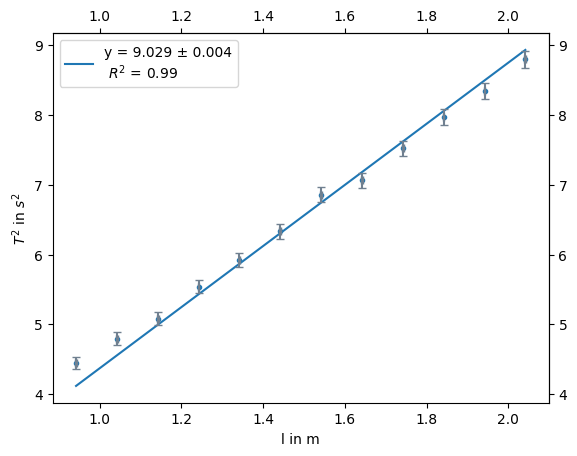

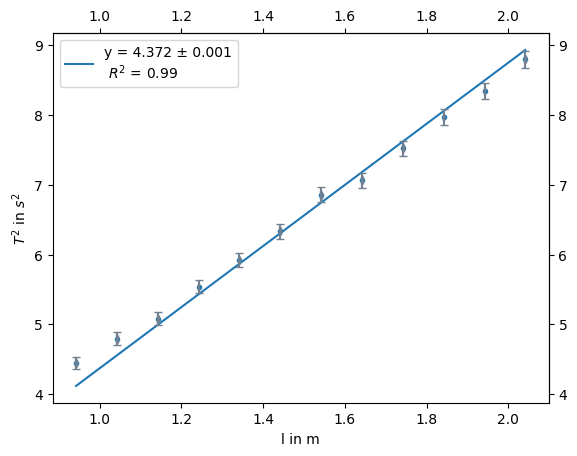

In [5]:
excel = PurePath(str(Path.cwd()) + "/" + ("F3_Fadenpendel.xlsx"))
oma = Pendulum(excel)

oma.plot_slope(0.001, 0.0012, 0.01, 0.1)
oma.plot_through_origin(0.001, 0.0012, 0.01, 0.1)

In [83]:
pendulum_file = PurePath("F3_Fadenpendel.xlsx") # PurePath -> don't access the filesystem
# alternative use Path.cwd()

# small angle approximation

how to set phi, so that the pendulum is in the small angle approximation? <br>

&ensp;&ensp;&ensp; sin(phi) ≈ phi -> max with an 1% error

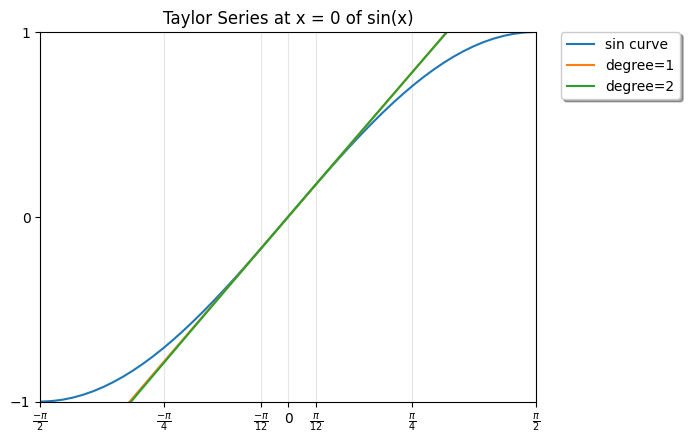

In [84]:
x = np.linspace(-np.pi, np.pi, 100) # generating 100 points between - π and π

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label="sin curve")    # plot a sin(x) curve

for degree in np.arange(1, 3, step=1):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    
    ax.plot(x, sin_taylor(x), label=f"degree={degree}") # plotting the Taylorseries to the second degree


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

ax.set_yticks([-1 , 0, 1])
ax.set_xticks([(- 0.5 * np.pi) , (- 0.25 * np.pi) ,(- (1/18) * np.pi) , 0, ((1/18) * np.pi), ( 0.25 * np.pi), ( 0.5 * np.pi)])
plt.axis([- 0.5 * np.pi, 0.5 * np.pi, -1, 1])
plt.grid(axis='x', color='0.90')
labels = [r'$\frac{-\pi}{2}$',r'$\frac{-\pi}{4}$',r'$\frac{-\pi}{12}$', r"0", r'$\frac{\pi}{12}$',r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$']

# labels = [r'$-\pi/2$',r'$-\pi/4$',r'$-\pi/18$', r"0", r'$\pi/18$',r'$\pi/4$', r'$\pi/2$']
ax.set_xticklabels(labels)
ax.set_title("Taylor Series at x = 0 of sin(x)")
plt.show()

# Error estimation for task 1

Estimation of the error of the period at the equilibrium position and at the maximum angle (or turning point of the pendulum)

In [85]:
task1_df = pd.read_excel(pendulum_file, sheet_name = "Rohdaten", skiprows=2)  

In [93]:
bob_position_df = task1_df.iloc[0:10].dropna(axis = 'columns')  # my data as dataframe
print(bob_position_df)

  T(Nullpunkt) in s T(Umkehrpunkt) in s
0               1.2                 2.1
1               1.1                   2
2                 1                 1.9
3               0.9                 1.9
4               1.2                 1.9
5               1.2                 2.1
6               1.1                   2
7               0.9                   2
8                 1                 1.8
9                 1                 1.9


# Gravitational constant g

determing g by plotting the period T against the length l of the pendulum. <br>
The period T is measured by the time of 10 oscillations (For the shortest and longest length l). <br>
The length l is measured from the point of suspension to the center of mass of the pendulum. <br>


In [101]:
task3 = pd.read_excel(pendulum_file, sheet_name = "Rohdaten", skiprows=52)  

In [ ]:
# determing g

def gravity(l, g):
    """determing acceleration with this slope

    Args:
        l (int): length of the pendulum -> x-value
        g (int): value that we want to find

    Returns:
        int: returns y-Value of this function -> T^2
    """
    return ((4 * np.pi ** 2) / g) * l


y = [results_df["Ti(mean)"][i]**2 for i in range(1,len(results_df["Ti(mean)"]))]  # y-Value for slope -> T^2 squared Period

l = [results_df['li,ges in m'][i] for i in range(1,len(results_df['li,ges in m']))] # x-Value -> l : length of pendulum
print(y)
print(l)
popt, pcov = curve_fit(gravity, l, y)   # -> popt value for g (Slope) and pcov ist the estimated approximate covariance of popt
g = popt[0]
print(g)

[4.133089, 3.964081, 3.8024999999999998, 3.6633959999999997, 3.5043840000000004, 3.3489000000000004, 3.157729, 3.010225, 2.8190410000000004, 2.709316]
[3.25, 3, 2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1]
26.204866113526883


## Propagation of uncertainty

total error for the gravitational constant g

In [ ]:
# total error of the length
oma_l = Statistics(length)
l_err = oma_l.total_uncertainty_value(0.01)
print(l_err)



# total error of the period
oma_p = Statistics(period)
p_err = oma_p.total_uncertainty_value(0.01)
print(p_err)

0.239565579052306
0.04297649228228019


In [ ]:
def gravitational_error(length, period, length_err, period_error):
    """I should ask the lecturer about this function.
    Coz which value should I use for the length and period?
    Actually I would prefere to use pcov from curve_fit.. but maybe that is not quite the scientific way to do it.
    Anyways.. this is the derivative of the function gravity from the Script that I got from the lecturer. 
    y = ((4 * np.pi ** 2) / g) * l
    y = T^2

    Args:
        length (int): mean lenght of the pendulum
        period (int): mean period of the pendulum (small angle approximation)
        length_err (int): total error of the length
        period_error (int): total error of the period

    Returns:
        int: error of the function gravity
    """
    return sqrt((((4 * (np.pi ** 2)) / period ** 2) * length_err) ** 2 + ((4 * (np.pi **2)) * ( length / (period ** 2)) * period_error) ** 2)

mean_length = oma_l.std_mean()  # calculate mean length
mean_period = oma_p.std_mean()  # calculate mean period

g_err = gravitational_error(mean_length, mean_period, l_err, p_err)
print(g_err)

2.980839958945883


In [ ]:
# errorbar for Period

y_stdev = [results_df["Ti(mean)"][i] * 2 * results_df["∆Ti,ges (mean)"][i] for i in range(1,len(results_df["Ti(mean)"]))]

Text(0, 0.5, '$T^{2}$ in $s^{2}$')

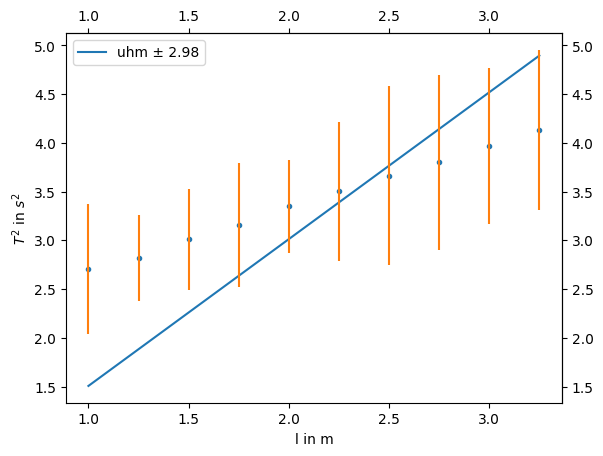

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

plt.scatter(x = l, y = y, marker = ".")
plt.plot(l, gravity(l, popt), label = 'uhm' + u" \u00B1 " + str(np.round(g_err, 2)))
plt.errorbar(l ,y, xerr= None, yerr = y_stdev, linestyle =' ')

ax.secondary_xaxis('top').tick_params(axis = 'x', direction = 'out')
ax.secondary_yaxis('right').tick_params(axis = 'y', direction = 'out')
plt.legend(loc = 'upper left')
plt.xlabel("l in m")
plt.ylabel("$T^{2}$ in $s^{2}$")